,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


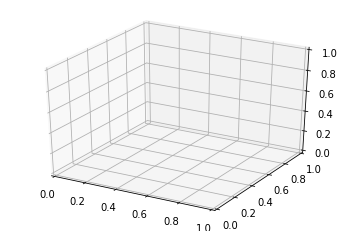

In [72]:
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Import our data into pandas from CSV
import pandas as pd
import numpy as np


# Load in csv
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Get data City and Ride Data
citydata_df = pd.read_csv(city_data)
ridedata_df = pd.read_csv(ride_data)

# Merge the first two datasets in single data set
combined_df = pd.merge(citydata_df,ridedata_df,how='outer',on='city')

# Display the data table for preview
combined_df.head()

## Bubble Plot of Ride Sharing Data

In [73]:
# Create a group based on the values in the city column
citygroup = combined_df.groupby('city')

#Average Fare ($) Per City
avgfare = citygroup.mean()['fare']

#Total Number of Rides Per City
ridetotal = citygroup['ride_id'].count()

#Total Number of Drivers Per City
drivertotal = citygroup.max()['driver_count']

#City Type (Urban, Suburban, Rural)
#set index
citytype = citydata_df.set_index('city')['type']

#Select columns dataframe: can load data through a file, inlcuding lists and dictionaires, csv files, execel files:
city_summary_df = pd.DataFrame({
    "Total Number of Rides": ridetotal,
    "Average Fare Per City": avgfare,
    "Driver Total": drivertotal,
    "City Type": citytype})

#dataframe for each city type
# Make the data
urban = city_summary_df[city_summary_df['City Type']=="Urban"]
suburban = city_summary_df[city_summary_df['City Type']=="Suburban"]
rural = city_summary_df[city_summary_df['City Type']=="Rural"]

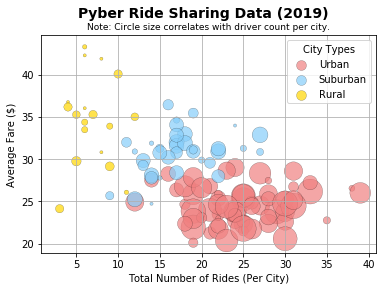

In [74]:
#Bubble Plot

urbanridecount = urban["Total Number of Rides"]
urbanfares = urban["Average Fare Per City"]

urbandrivercount = urban["Driver Total"]

suburbanridecount = suburban["Total Number of Rides"]
suburbanfares = suburban["Average Fare Per City"]

suburbandrivercount = suburban["Driver Total"]

ruralridecount = rural["Total Number of Rides"]
ruralfares = rural["Average Fare Per City"]

ruraldrivercount = rural["Driver Total"]

#Tells matplotlib that we want to make a scatter plot with colors
colorset = {'Coral':'#F08080','SkyBlue':'#87CEFA','Gold':'#FFD700'}

colors = {'Urban': colorset['Coral'], 'Suburban': colorset['SkyBlue'], 'Rural': colorset['Gold']}

plt.scatter(urbanridecount, urbanfares, s=urbandrivercount*9, color=colors['Urban'],
            edgecolor='black', label='Urban',alpha=.7, linewidths=.22)
plt.scatter(suburbanridecount, suburbanfares, s=suburbandrivercount*10, color=colors['Suburban'],
            edgecolor='black', label='Suburban',alpha=.7,linewidths=.22)
plt.scatter(ruralridecount, ruralfares, s=ruraldrivercount*10, color=colors['Rural'],
            edgecolor='black', label='Rural',alpha=.7,linewidths=.22)


plt.suptitle("Pyber Ride Sharing Data (2019)", fontsize=14, fontweight='bold')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(title='City Types')
lgnd.legendHandles[0]._sizes = [99]
lgnd.legendHandles[1]._sizes = [99]
lgnd.legendHandles[2]._sizes = [99]

# Text label regarding circle size
plt.title("Note: Circle size correlates with driver count per city.", fontsize=9)

plt.show()

## Total Fares by City Type

In [75]:
# split combined df into separate city types
urbandata = combined_df[combined_df['type']=="Urban"]
suburbandata = combined_df[combined_df['type']=="Suburban"]
ruraldata = combined_df[combined_df['type']=="Rural"]

# The colors of each section of the pie chart
colors1 = ["lightcoral","gold","skyblue"]
colors2 = ["gold","skyblue","lightcoral"]

Text(0.5, 0.98, '% of Total Fares by City Type')

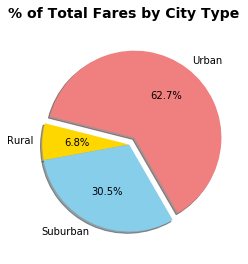

In [76]:
# % Total Fares by City Type Pie Chart
# Start calculating

#Total fares collected
totalfares = combined_df.sum()['fare']

#Total urban fare 
urbantotalfare = urbandata['fare'].sum()

#Total surburban fare 
suburbantotalfare = suburbandata['fare'].sum()

#Total Rural fare 
ruraltotalfare = ruraldata['fare'].sum()

# Labels for the sections of our pie chart
labels = ["Urban","Rural","Suburban"]
farevalues = [urbantotalfare,ruraltotalfare,suburbantotalfare]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100] 

# Build Pie Chart
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(farevalues,explode=(.1,0,0),colors=colors1,startangle=300,labels=labels,autopct="%1.1f%%",shadow=True)
plt.suptitle("% of Total Fares by City Type", fontsize=14, fontweight='bold')



In [77]:
plt.show()

## Total Rides by City Type

Text(0.5, 0.98, '% of Total Rides by City Type')

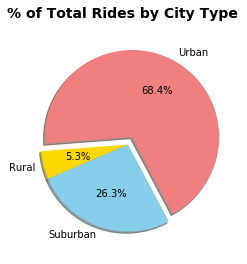

In [78]:
# % Total Rides by City Type Pie Chart

# Creates the pie chart based upon the values 
# Automatically finds the percentages of each part of the pie chart

#Total ride
totalrides = combined_df.count()['ride_id']

#Total urban ride
urbanridecount = urbandata['ride_id'].count()

#Total surburban ride 
suburbanridecount = suburbandata['ride_id'].count()

#Total rural ride 
ruralridecount = ruraldata['ride_id'].count()

#Labels for the sections of our pie chart
labels = ["Urban","Rural","Suburban"]
ridevalues = [urbanridecount,ruralridecount,suburbanridecount]

#Tells matplotlib to seperate the "Python" section from the others
#The colors of each section of the pie chart
plt.pie(ridevalues,explode=(0.1,0,0),colors=colors1,startangle=298,labels=labels,autopct='%1.1f%%',shadow=True)
plt.suptitle("% of Total Rides by City Type", fontsize=14, fontweight='bold')

In [79]:
plt.show()

## Total Drivers by City Type

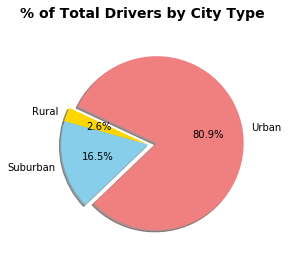

In [80]:
# % Total Drivers by City Type Pie Chart

#Total driver 
totaldrivers = citydata_df.groupby('type').sum()['driver_count']

labels = ["Rural","Suburban","Urban"]

# Build Pie Chart
plt.pie(totaldrivers,explode=(0,0,0.1),startangle=155,labels=labels,colors=colors2,autopct='%1.1f%%',shadow=True)
plt.suptitle("% of Total Drivers by City Type", fontsize=14, fontweight='bold')

plt.show()

In [81]:
# Show Figure
plt.show()

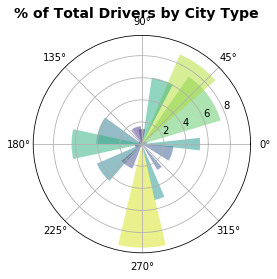

In [82]:
#Total Drivers by City Type Pie Chart on Polar Axis

# Calculate Type Percents
#Total driver 
totaldrivers = citydata_df.groupby('type').sum()['driver_count']

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

labels = ["Rural","Suburban","Urban"]
plt.suptitle("% of Total Drivers by City Type", fontsize=14, fontweight='bold')

plt.show()


In [83]:
# Show Figure
plt.show()

In [ ]:
Please give me extra credit for this pie chart